### 603180 金牌橱柜
##### 加权平均净资产收益率

| 2019 | 2018 | 2017 |
| ---- | ---- | ---- |
| 27.78% | 39.53% | 27.78% |

##### 2020-11-02
* 最初模版

In [12]:
ticker = '603180'

In [13]:
%%html
<style>
table {float:left}
</style>

In [14]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import baostock

sys.path.append(os.path.join(os.path.expanduser('~'), 'GitHub', 'stock'))
import script.data as data
import script.utils as utils
import script.bsutil as bu
from script.figure import draw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
baostock.login()
code = bu.get_bs_code(ticker)
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
mkt = bu.get_price_daily(code)
bs = data.get_BS(ticker)
baostock.logout()

login success!
logout success!


In [16]:
change = utils.column_pct(income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']], periods=-1)
income_change = pd.concat([income[['截止日期', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change.set_index('截止日期')

,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
截止日期,,,,,
2019-12-31,3.66,3.66,"2,125,444,792 ( 24.9%)","1,900,152,366 ( 25.2%)","242,496,669 ( 15.4%)"
2018-12-31,3.14,3.14,"1,701,677,973 ( 18.0%)","1,517,714,337 ( 17.4%)","210,190,542 ( 26.1%)"
2017-12-31,2.78,2.78,"1,441,967,105 ( 31.2%)","1,292,454,276 ( 28.8%)","166,748,221 ( 73.3%)"
2016-12-31,1.92,1.92,"1,098,888,660 ( 40.3%)","1,003,250,753 ( 35.3%)","96,225,330 (103.3%)"
2015-12-31,0.95,0.95,"783,511,108 ( 14.2%)","741,741,115 ( 14.9%)","47,337,640 ( 18.3%)"
2014-12-31,0.80,0.80,"686,205,874 ( nan%)","645,320,486 ( nan%)","40,027,559 ( nan%)"


In [17]:
change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
incomeq_change[:24].set_index('截止日期')

,营业收入,归属于母公司所有者的净利润
截止日期,,
2020-09-30,"786,539,122 ( 30.7%)","87,150,510 ( 40.1%)"
2020-06-30,"561,467,196 ( 10.7%)","55,076,274 ( 8.6%)"
2020-03-31,"267,197,139 ( -3.9%)","6,394,814 (-66.5%)"
2019-12-31,"738,497,527 ( 29.2%)","110,493,888 ( 21.4%)"
2019-09-30,"601,579,282 ( 23.5%)","62,202,785 ( 7.5%)"
2019-06-30,"507,236,864 ( 33.1%)","50,715,178 ( 18.7%)"
2019-03-31,"278,131,119 ( 6.2%)","19,084,817 ( 2.7%)"
2018-12-31,"571,753,381 ( 20.4%)","91,031,258 ( 19.5%)"
2018-09-30,"486,984,717 ( 19.2%)","57,861,136 ( 30.5%)"


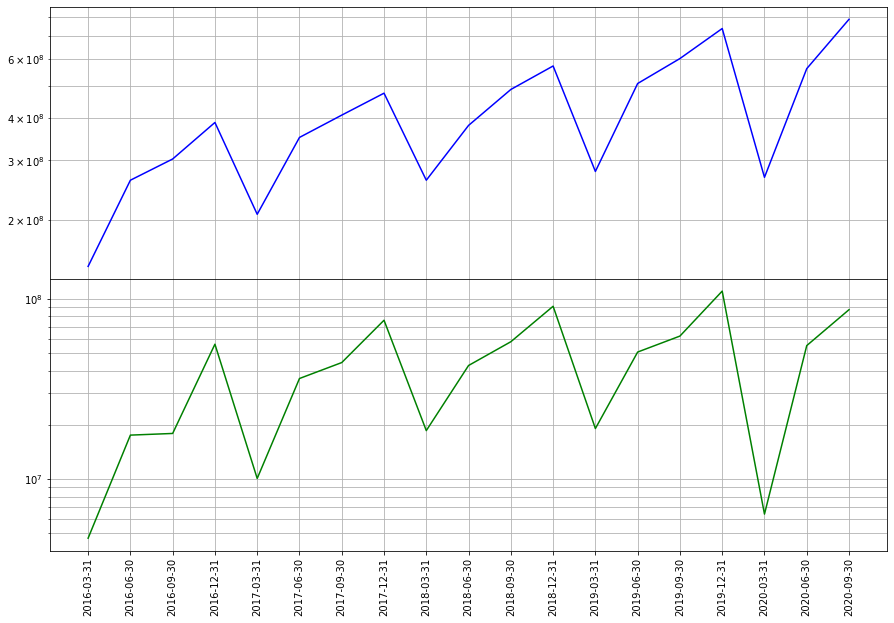

In [18]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [19]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,35.8,11.4
2018-12-31,39.0,12.3
2017-12-31,39.1,11.6
2016-12-31,38.1,8.8
2015-12-31,41.2,6.0
2014-12-31,40.9,5.7


In [20]:
change = utils.column_pct(bs[['存货', '应付账款', '应收账款']], periods=-1)
bs_change = pd.concat([bs[['截止日期']], change], axis=1)
bs_change.set_index('截止日期', inplace=True)
change = utils.column_pct(income[['营业收入']], periods=-1)
income_change = pd.concat([income[['截止日期']], change], axis=1)
income_change.set_index('截止日期', inplace=True)
pd.concat([income_change, bs_change], axis=1)

,营业收入,存货,应付账款,应收账款
截止日期,,,,
2019-12-31,"2,125,444,792 ( 24.9%)","242,936,162 ( 44.7%)","446,437,038 ( 24.9%)","38,097,954 ( 48.3%)"
2018-12-31,"1,701,677,973 ( 18.0%)","167,897,766 ( 23.7%)","357,544,379 ( 24.4%)","25,694,223 ( 52.7%)"
2017-12-31,"1,441,967,105 ( 31.2%)","135,708,617 ( 14.4%)","287,467,203 ( 28.9%)","16,827,380 (108.0%)"
2016-12-31,"1,098,888,660 ( 40.3%)","118,663,830 ( 8.8%)","223,023,106 ( 27.4%)","8,090,940 ( 0.6%)"
2015-12-31,"783,511,108 ( 14.2%)","109,072,206 ( 12.3%)","175,033,837 ( 66.2%)","8,041,862 ( 11.5%)"
2014-12-31,"686,205,874 ( nan%)","97,156,305 ( nan%)","105,284,615 ( nan%)","7,213,725 ( nan%)"


In [21]:
mkt['前复权'] = mkt['close'].round(2)
mkt['滚动市盈率'] = mkt['peTTM'].round(1)
mkt['交易日期'] = pd.to_datetime(mkt['date'])
df = mkt[['前复权', '滚动市盈率']].groupby(mkt['交易日期'].dt.year).agg(['min', 'max', 'first', 'last'])[-10:]
df['前复权增长'] = df['前复权'][['first', 'last']].apply(lambda x: round((x[1]-x[0])/x[0] * 100,1), axis=1)
df.drop(columns=[('前复权', 'min'), ('前复权', 'max'), ('滚动市盈率', 'first'), ('滚动市盈率', 'last')])


前复权        滚动市盈率        前复权增长
      first   last   min   max       
交易日期                                 
2017  27.66  91.10  26.4  66.0  229.4
2018  92.56  40.27  16.3  81.7  -56.5
2019  37.90  47.16  14.7  30.2   24.4
2020  47.73  53.03  15.7  28.8   11.1

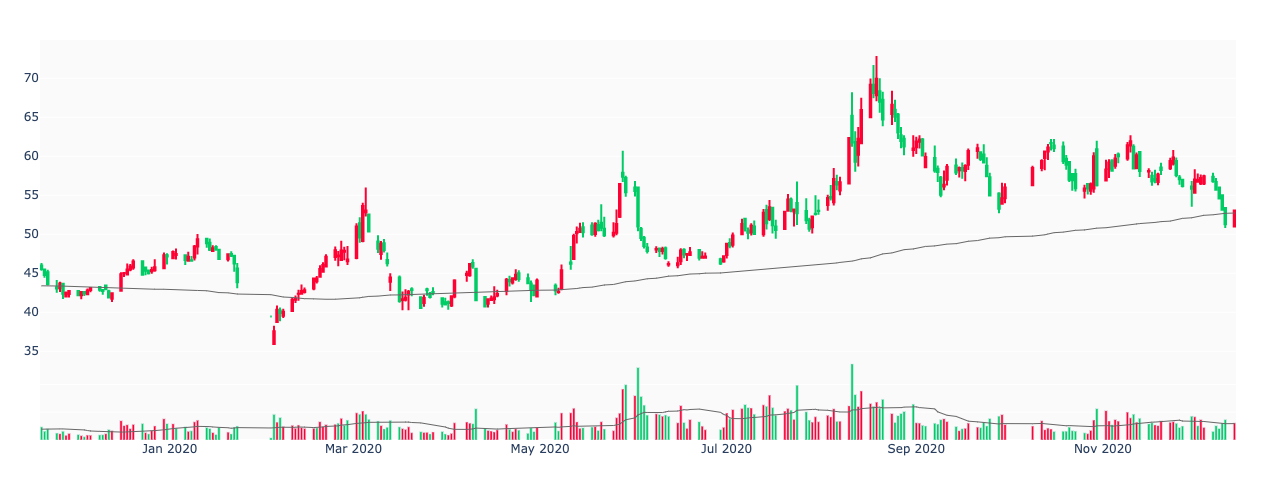

In [22]:
draw(mkt, 260, 200, 20)